In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\ashak/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-11-22 Python-3.10.9 torch-2.1.0 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [5]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 740.9ms pre-process, 43.9ms inference, 60.4ms NMS per image at shape (1, 3, 384, 640)


In [ ]:
plt.imshow(np.squeeze(results.render()))

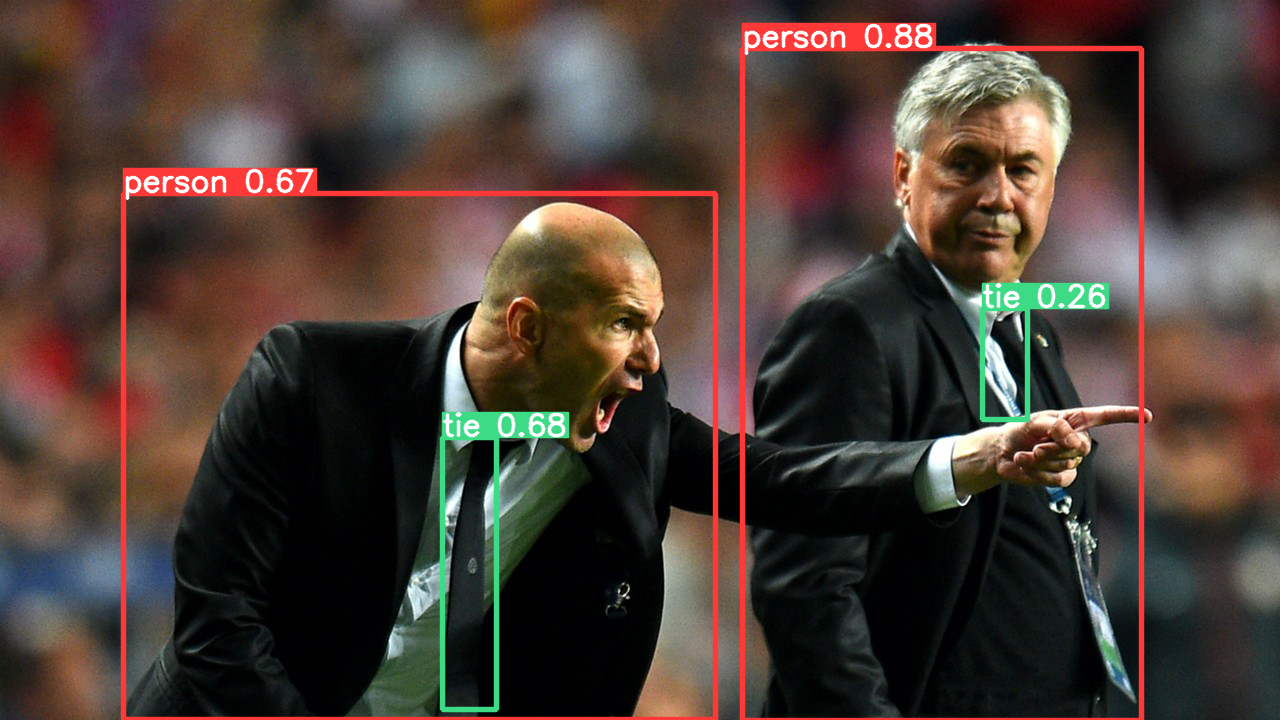

In [6]:
results.show()

In [ ]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Train

In [7]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import uuid
import time

In [8]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake' , 'drowsy']
number_imgs = 20

In [19]:
cap = cv2.VideoCapture(0)

# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [9]:
!git clone https://github.com/HumanSignal/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [10]:
!pip install pyqt5 lxml
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!cd yolov5 && python train.py --img 320 --batch 8 --epochs 600 --data custom.yml --weights yolov5s.pt --workers 2

In [60]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\ashak/.cache\torch\hub\master.zip
YOLOv5  2023-10-12 Python-3.10.9 torch-2.1.0 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [71]:
img = os.path.join('data', 'images', 'IMG-20231012-WA0032.jpg')

In [72]:
results = model(img)

In [73]:
results.print()

image 1/1: 1600x900 1 awake
Speed: 364.1ms pre-process, 94.1ms inference, 0.0ms NMS per image at shape (1, 3, 640, 384)


In [76]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()